# <div style="text-align: center">INFO 6105 Data Science Eng Methods and Tools Final Project</div>  


### <div style="text-align: center"><b>Topic: Historical Greenhouse Gas Emissions Analysis
</b></div>
#### <div style="text-align: center">Group 9: Naved Shaikh, Darshana Rokade, Vasudha Ambre</div>

## <div style="text-align: center"><b>Introduction: Addressing the Global Climate Crisis</b></div>
 
<div>
<p>The global climate crisis, fueled predominantly by human-caused greenhouse gas (GHG) emissions, stands as one of the most pressing challenges of our time. The consequences of climate change are far-reaching, impacting ecosystems, economies, and human well-being across the globe. In order to effectively combat this crisis, it is imperative to understand the dynamics of GHG emissions and their sources on a global scale.
</p>
</div>
 
 
<div style="display: flex; justify-content: center; align-items: center;">
<img src="images/1.jpg" width="300" height="300" style="margin-right: 20px; margin-left: 180px">
<img src="images/4.jpg" width="300" height="300" style="margin-left: 20px;">
</div>
 
 
## <div style="text-align: center"><b>Understanding Global GHG Emissions:</b></div>
 
 
Recent studies reveal a stark reality: approximately 60% of GHG emissions originate from just ten countries, while the combined emissions from the 100 least-emitting nations contribute to less than 3% of the global total. This vast disproportion underscores the critical role that certain regions play in driving climate change, highlighting the need for targeted mitigation strategies on both a national and international level.

Above is the large heatmap that provides a detailed look at how each variable is related to the others within the dataset. Each square in the heatmap represents the correlation coefficient between two variables, with 1 indicating a perfect positive correlation, -1 indicating a perfect negative correlation, and 0 indicating no linear correlation.  
The colors help in visually assessing the strength and direction of the relationship, with warmer colors suggesting stronger positive correlations and cooler colors suggesting stronger negative correlations. This type of visualization is invaluable for identifying which variables move together and may thus be used for predictive modeling or to understand underlying patterns in environmental and economic data.

## Importing Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Preparation and Preliminary Analysis

In [2]:
#Reading Dataset
df = pd.read_csv("data/climatewatch-usemissions.csv")
df

,State,Year,Total_GHG_Emissions_Excluding_LUCF,Total_GHG_Emissions_Including_LUCF,Total_CO2_excluding_LUCF,Total_CH4,Total_N2O,Total_F-Gas,Energy,Industrial_Processes,...,Bunker_Fuels,Electric_Power,Commercial,Residential,Industrial,Transportation,Fugitive_Emissions,State_GDP,Population,Total_Energy_Use
0,Alabama,1990,142.417267,81.645894,112.157128,23.710782,6.034132,0.515225,127.881865,3.442879,...,0.000000,50.580225,2.455356,3.233194,25.450395,29.582733,16.579961,83766.0,4050055,4.197098e+04
1,Alaska,1990,47.394637,44.956391,35.893979,11.185360,0.278483,0.036815,45.867810,1.093494,...,0.000000,2.612978,2.210446,1.612772,15.851075,12.300752,11.279787,28772.0,553290,1.471864e+04
2,Arizona,1990,71.687896,68.048443,63.291388,4.090110,3.480351,0.826048,64.545882,1.155930,...,0.000000,32.680547,1.915212,1.901865,3.887329,24.064867,0.096061,81606.0,3684097,2.366177e+04
3,Arkansas,1990,71.973584,24.753434,52.211375,9.563331,9.963139,0.235740,53.107620,1.151356,...,0.000000,21.697883,1.630468,2.559084,9.488513,16.882259,0.849414,44496.0,2356586,2.156930e+04
4,California,1990,430.660671,363.225554,368.717790,35.785491,23.600369,2.557020,379.550134,7.731291,...,0.000000,40.343922,19.101576,30.189209,71.881356,212.571891,5.462181,906103.0,29959515,1.876164e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,Washington,2018,97.296446,65.342674,82.046289,6.185934,4.346750,4.717473,81.620211,5.939311,...,0.027622,10.061289,4.766244,5.857520,13.327250,47.607909,0.000000,524486.9,7523869,2.078665e+06
1504,West Virginia,2018,115.714795,100.078012,89.895261,23.579975,1.029359,1.210201,109.725451,3.371314,...,0.000000,59.915487,1.828314,1.872126,11.468839,13.154700,21.485985,71858.7,1804291,8.329140e+05
1505,Wisconsin,2018,128.884615,109.999975,101.752437,12.627558,11.445894,3.058726,101.452129,4.234074,...,0.000000,39.238932,6.683348,10.194157,14.078687,31.257005,0.000000,303767.4,5807406,1.885868e+06
1506,Wyoming,2018,88.995627,100.170035,66.742306,18.373199,3.565572,0.314551,78.844546,3.421720,...,0.000000,39.958798,0.969447,0.990317,13.544744,8.110488,15.270751,38696.3,577601,5.585940e+05


In [3]:
# Get information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               1508 non-null   object 
 1   Year                                1508 non-null   int64  
 2   Total_GHG_Emissions_Excluding_LUCF  1508 non-null   float64
 3   Total_GHG_Emissions_Including_LUCF  1508 non-null   float64
 4   Total_CO2_excluding_LUCF            1508 non-null   float64
 5   Total_CH4                           1508 non-null   float64
 6   Total_N2O                           1508 non-null   float64
 7   Total_F-Gas                         1508 non-null   float64
 8   Energy                              1508 non-null   float64
 9   Industrial_Processes                1508 non-null   float64
 10  Agriculture                         1508 non-null   float64
 11  Waste                               1508 no

In [4]:
#checking null values
df.isnull().sum()

State                                 0
Year                                  0
Total_GHG_Emissions_Excluding_LUCF    0
Total_GHG_Emissions_Including_LUCF    0
Total_CO2_excluding_LUCF              0
Total_CH4                             0
Total_N2O                             0
Total_F-Gas                           0
Energy                                0
Industrial_Processes                  0
Agriculture                           0
Waste                                 0
Land_Use_and_Forestry                 0
Bunker_Fuels                          0
Electric_Power                        0
Commercial                            0
Residential                           0
Industrial                            0
Transportation                        0
Fugitive_Emissions                    0
State_GDP                             0
Population                            0
Total_Energy_Use                      0
dtype: int64

In [5]:
# Identifying Duplicate Rows:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,State,Year,Total_GHG_Emissions_Excluding_LUCF,Total_GHG_Emissions_Including_LUCF,Total_CO2_excluding_LUCF,Total_CH4,Total_N2O,Total_F-Gas,Energy,Industrial_Processes,...,Bunker_Fuels,Electric_Power,Commercial,Residential,Industrial,Transportation,Fugitive_Emissions,State_GDP,Population,Total_Energy_Use


In [6]:
# Retrieve and print the list of all column names from the DataFrame 'df'.
variables = df.columns.tolist()
print(variables)

['State', 'Year', 'Total_GHG_Emissions_Excluding_LUCF', 'Total_GHG_Emissions_Including_LUCF', 'Total_CO2_excluding_LUCF', 'Total_CH4', 'Total_N2O', 'Total_F-Gas', 'Energy', 'Industrial_Processes', 'Agriculture', 'Waste', 'Land_Use_and_Forestry', 'Bunker_Fuels', 'Electric_Power', 'Commercial', 'Residential', 'Industrial', 'Transportation', 'Fugitive_Emissions', 'State_GDP', 'Population', 'Total_Energy_Use']


# Data Analysis

## Comprehensive Correlation Analysis Between Environmental and Economic Factors  
Let's generates a correlation matrix for all the numerical variables in the dataset and visualizes it as a heatmap. This matrix quantifies the linear relationships between variables, using the 'coolwarm' color scheme to differentiate between positive (red) and negative (blue) correlations. Annotations are added to display the exact correlation coefficients, and the plot is formatted for clarity and ease of interpretation.

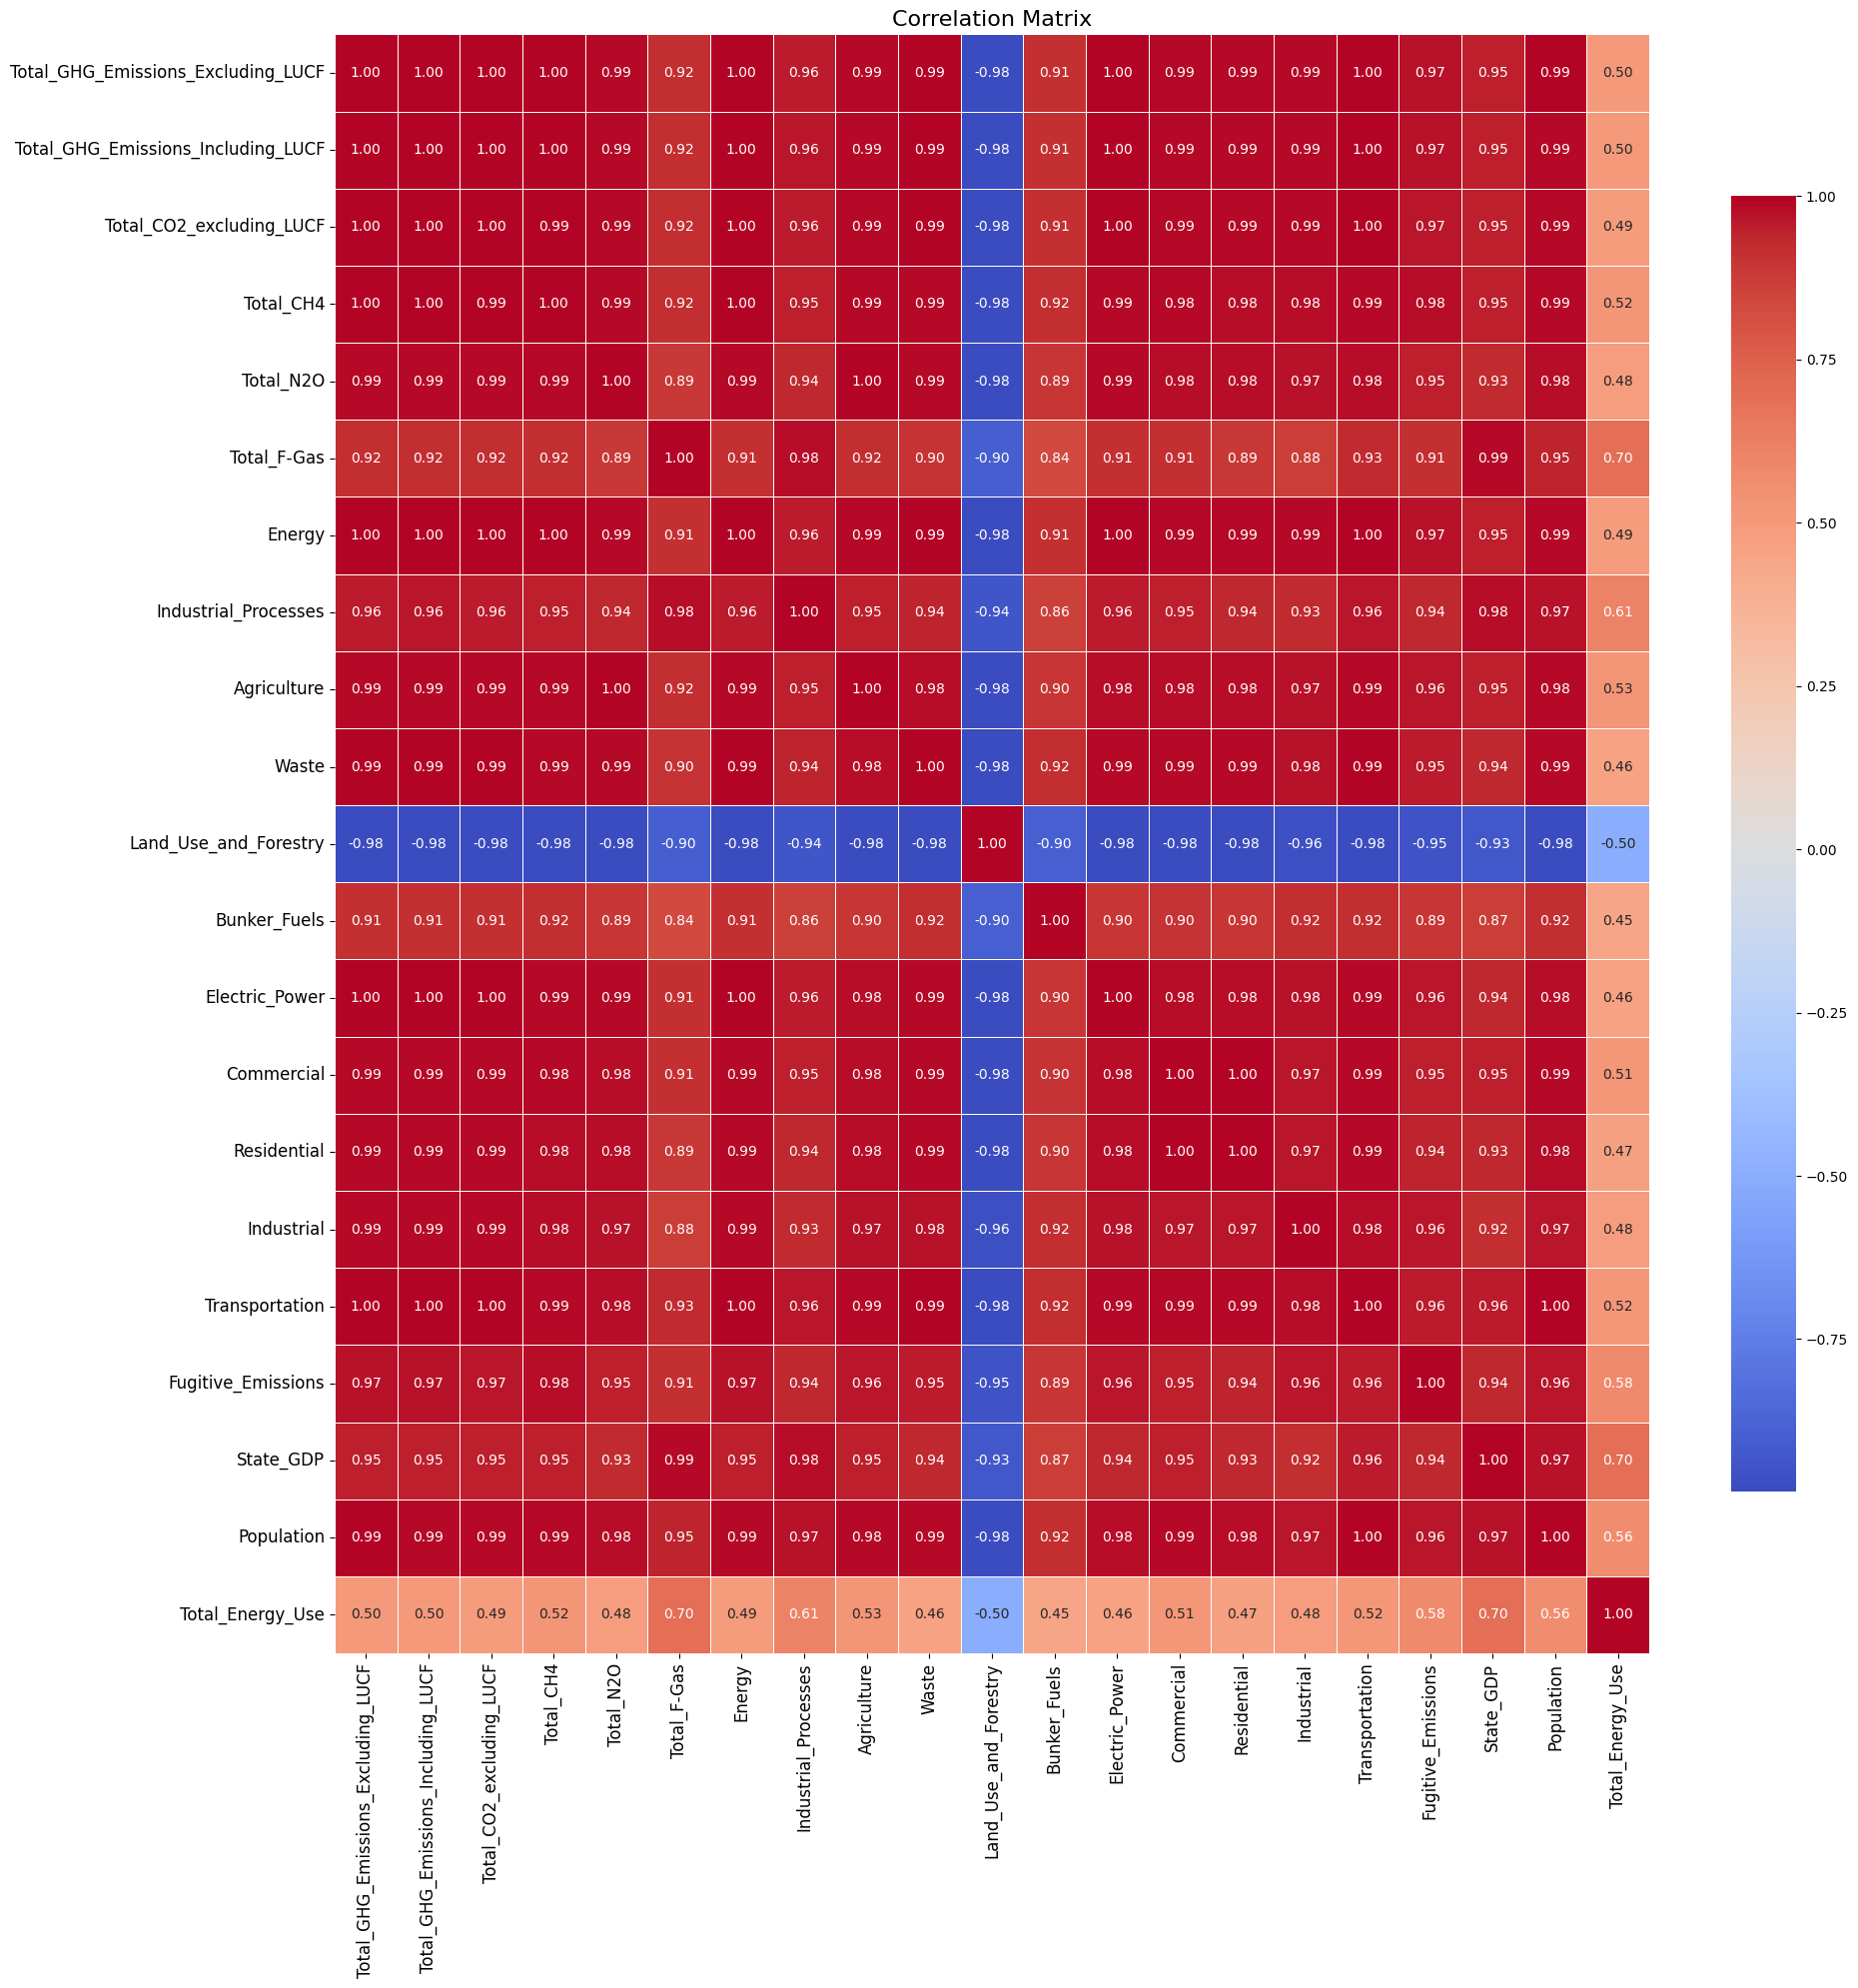

In [7]:
# Remove 'year' column from the DataFrame
df_without_year_and_state = df.drop(columns=['Year', 'State'])
 
# Exclude non-numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]
 
# Calculate correlation matrix
correlation_matrix = df_without_year_and_state.corr()
 
# Set up the plot
plt.figure(figsize=(20, 20))
 
# Plot heatmap
sns.heatmap(correlation_matrix, 
            annot=True,            # Show correlation values
            cmap='coolwarm',      # Color map
            fmt=".2f",            # Format of annotations
            linewidths=.5,        # Width of lines that divide each cell
            cbar_kws={"shrink": .8})  # Size of color bar
 
# Customize plot
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent cutoff of labels
 
# Show plot
plt.show()

Above is the large heatmap that provides a detailed look at how each variable is related to the others within the dataset. Each square in the heatmap represents the correlation coefficient between two variables, with 1 indicating a perfect positive correlation, -1 indicating a perfect negative correlation, and 0 indicating no linear correlation.  
The colors help in visually assessing the strength and direction of the relationship, with warmer colors suggesting stronger positive correlations and cooler colors suggesting stronger negative correlations. This type of visualization is invaluable for identifying which variables move together and may thus be used for predictive modeling or to understand underlying patterns in environmental and economic data.

In [8]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')  # This selects columns that contain numeric data only

# Calculate Pearson correlation coefficients
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
correlation_matrix

,Year,Total_GHG_Emissions_Excluding_LUCF,Total_GHG_Emissions_Including_LUCF,Total_CO2_excluding_LUCF,Total_CH4,Total_N2O,Total_F-Gas,Energy,Industrial_Processes,Agriculture,...,Bunker_Fuels,Electric_Power,Commercial,Residential,Industrial,Transportation,Fugitive_Emissions,State_GDP,Population,Total_Energy_Use
Year,1.000000,0.003482,0.004394,0.001788,0.006768,-0.010776,0.106970,0.000455,0.068880,0.008326,...,-0.003843,-0.000548,0.000090,-0.012692,-0.013481,0.009581,0.023162,0.079112,0.022296,0.173526
Total_GHG_Emissions_Excluding_LUCF,0.003482,1.000000,0.999615,0.999866,0.995827,0.989801,0.919015,0.999852,0.961189,0.990579,...,0.912846,0.995980,0.989279,0.986741,0.985886,0.997214,0.969567,0.950511,0.992312,0.501742
Total_GHG_Emissions_Including_LUCF,0.004394,0.999615,1.000000,0.999555,0.995239,0.988521,0.919276,0.999510,0.961784,0.989573,...,0.912481,0.995800,0.987743,0.985241,0.986568,0.996399,0.969862,0.950129,0.991053,0.500622
Total_CO2_excluding_LUCF,0.001788,0.999866,0.999555,1.000000,0.994548,0.988456,0.916576,0.999929,0.960349,0.988545,...,0.912757,0.996274,0.988811,0.986768,0.986405,0.997117,0.967520,0.948480,0.991515,0.494956
Total_CH4,0.006768,0.995827,0.995239,0.994548,1.000000,0.987772,0.918412,0.995323,0.953361,0.992096,...,0.916108,0.989875,0.984804,0.979832,0.983072,0.991828,0.983492,0.949382,0.989287,0.521884
Total_N2O,-0.010776,0.989801,0.988521,0.988456,0.987772,1.000000,0.887917,0.988671,0.936668,0.996537,...,0.893167,0.985057,0.984321,0.984184,0.974534,0.984380,0.952539,0.926689,0.979124,0.481553
Total_F-Gas,0.106970,0.919015,0.919276,0.916576,0.918412,0.887917,1.000000,0.914471,0.980098,0.915180,...,0.836337,0.908474,0.909174,0.889392,0.875338,0.929262,0.911010,0.988542,0.945495,0.696622
Energy,0.000455,0.999852,0.999510,0.999929,0.995323,0.988671,0.914471,1.000000,0.958081,0.988659,...,0.913776,0.996114,0.988856,0.986833,0.987183,0.996821,0.969405,0.947009,0.991203,0.494130
Industrial_Processes,0.068880,0.961189,0.961784,0.960349,0.953361,0.936668,0.980098,0.958081,1.000000,0.951606,...,0.860809,0.957282,0.946373,0.935046,0.925991,0.964701,0.935488,0.982721,0.969096,0.611611
Agriculture,0.008326,0.990579,0.989573,0.988545,0.992096,0.996537,0.915180,0.988659,0.951606,1.000000,...,0.898170,0.983784,0.982315,0.977983,0.973316,0.986716,0.962527,0.946760,0.984646,0.527208


## Visualization of Peak Energy Consumption Years  
This code cell is designed to analyze and visualize the top five years with the highest total energy use. It starts by setting a seaborn style for the plot, then aggregates the total energy use by year, identifies the top five years with the largest values, and plots these as a bar chart. The plot is styled for clarity, with appropriate labels and title.

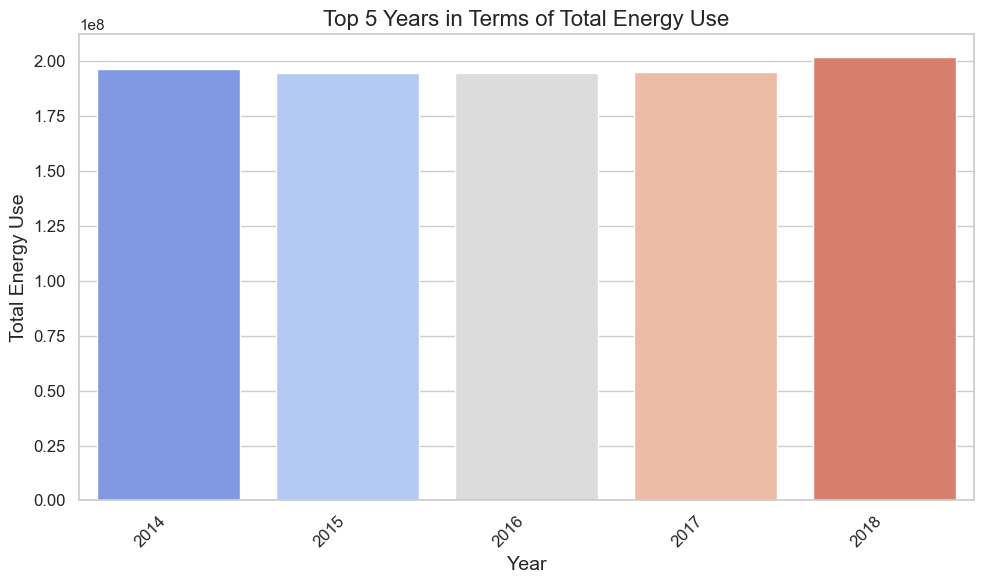

In [9]:
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Aggregate total energy use for each year
energy_by_year = df.groupby('Year')['Total_Energy_Use'].sum()

# Select the top 5 years based on total energy use
top_5_years = energy_by_year.nlargest(5)

# Plot the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_5_years.index, y=top_5_years.values, palette='coolwarm')
ax.set_title('Top 5 Years in Terms of Total Energy Use', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Total Energy Use', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Above bar chart presents the top five years of total energy use, showcasing the magnitude of energy consumption for each of these peak years. The colors from the 'coolwarm' palette likely represent different ranges of energy use, with warmer colors possibly indicating higher energy consumption. The chart's title, axes labels, and tick labels are formatted for readability, and the plot is adjusted to fit the layout properly without cutting off labels. The years are displayed on the x-axis, while the y-axis represents the total energy use in units (presumably in a standard energy measurement unit). The chart helps to quickly identify patterns or trends in energy usage over the specified years.

## Population Analysis of the Most Populous States  
Now let's performs an analysis to identify and visualize the top five most populous states in the dataset, excluding the aggregate data labeled "United States". It filters the DataFrame to exclude the "United States" row, calculates the maximum population for each state, identifies the top five states with the largest populations, and creates a bar chart to display this information.

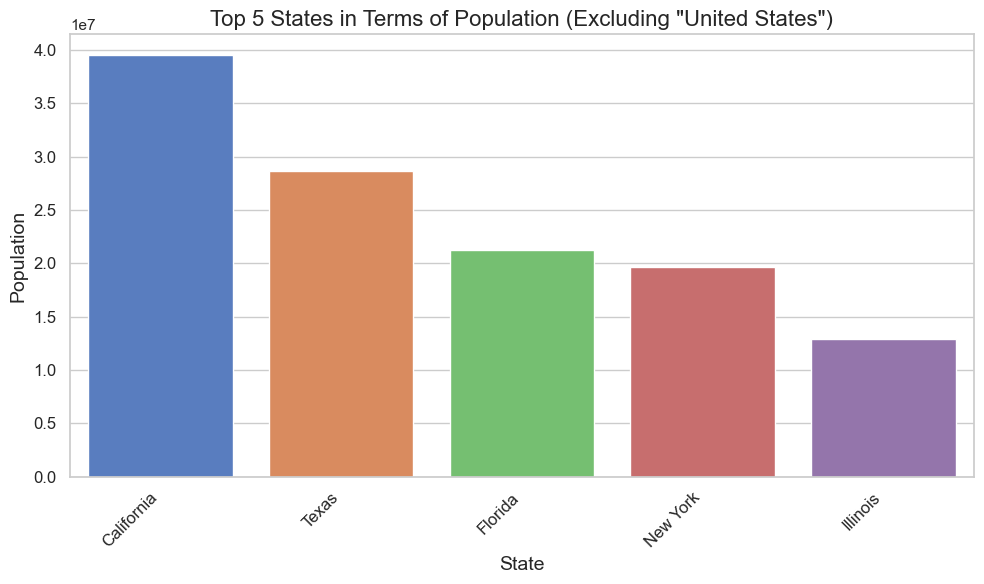

In [10]:
# Drop rows where the state is "United States"
df_filtered = df[df['State'] != 'United States']

# Aggregate total population for each state after filtering
population_by_state = df_filtered.groupby('State')['Population'].max()

# Select the top 5 states based on total population
top_5_states = population_by_state.nlargest(5)

# Plot the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_5_states.index, y=top_5_states.values, palette='muted')
ax.set_title('Top 5 States in Terms of Population (Excluding "United States")', fontsize=16)
ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('Population', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

This bar chart showcases the population distribution among the top five states in the United States. Each bar represents a state, with distinct colors for easy differentiation. The x-axis displays the state names, while the y-axis represents the population count, likely in millions given the scale of the chart.  
This visualization effectively communicates the relative population sizes of the top states, offering valuable insights into regional demographic patterns. Such information is crucial for understanding resource allocation, policy planning, and broader socio-economic dynamics within the country.

## Greenhouse Gas Emissions Trends with and without Land Use, Land-Use Change, and Forestry (LUCF)  
Here we are creating two line graphs.  
The first graph displays the trend of total greenhouse gas emissions over time, excluding emissions from Land Use, Land-Use Change, and Forestry (LUCF).  
The second graph includes these emissions. The year data is converted to numeric for plotting purposes, emissions data is aggregated by year, and plotted with markers to emphasize each data point.

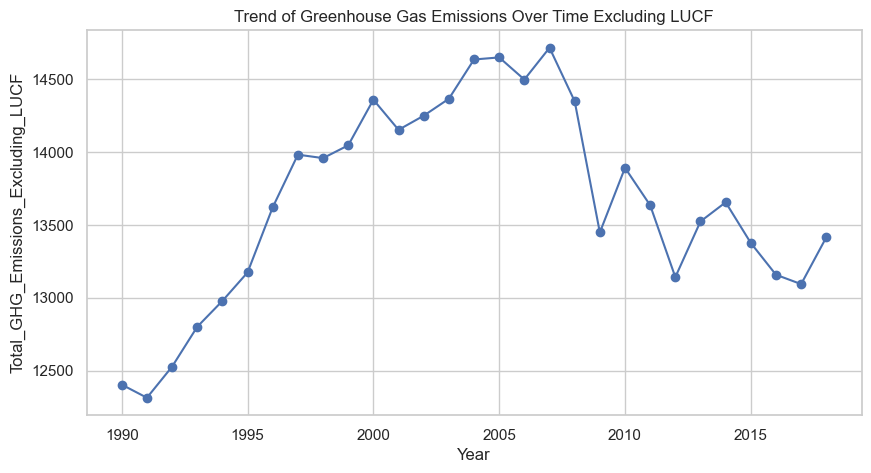

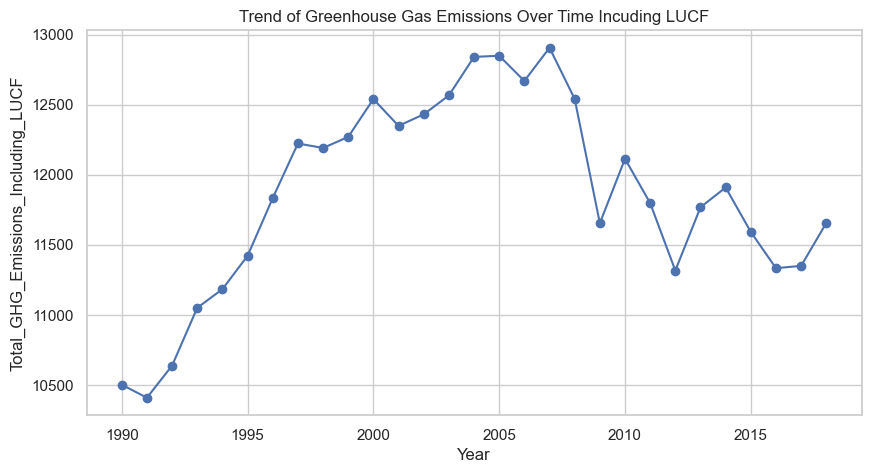

In [11]:
# Converting 'Year' to numeric for plotting
df['Year'] = pd.to_numeric(df['Year'])

# Grouping emissions_data by year and summing emissions
emissions_by_year = df.groupby('Year')['Total_GHG_Emissions_Excluding_LUCF'].sum()

#Plotting the trend of emissions over years
plt.figure(figsize=(10, 5))
plt.plot(emissions_by_year.index, emissions_by_year, marker='o', linestyle='-', color='b')
plt.title('Trend of Greenhouse Gas Emissions Over Time Excluding LUCF')
plt.xlabel('Year')
plt.ylabel('Total_GHG_Emissions_Excluding_LUCF')
plt.grid(True)
plt.show()

# Grouping emissions_data by year and summing emissions
emissions_by_year = df.groupby('Year')['Total_GHG_Emissions_Including_LUCF'].sum()

# Plotting the trend of emissions over years
plt.figure(figsize=(10, 5))
plt.plot(emissions_by_year.index, emissions_by_year, marker='o', linestyle='-', color='b')
plt.title('Trend of Greenhouse Gas Emissions Over Time Incuding LUCF')
plt.xlabel('Year')
plt.ylabel('Total_GHG_Emissions_Including_LUCF')
plt.grid(True)
plt.show()

The output consists of two line graphs. The upper graph represents the annual trend of greenhouse gas emissions excluding LUCF contributions, while the lower graph includes LUCF. Both graphs show the years on the x-axis and the total greenhouse gas emissions on the y-axis.  
**These visualizations are crucial for understanding the impact of LUCF activities** on total emissions and identifying patterns or changes in emissions over time. The markers on the lines indicate the data points for each year, and the gridlines help in estimating the values at a glance. The differences between the two graphs may reflect how land use and forestry practices contribute to the overall greenhouse gas emissions profile.

## Sector-wise Distribution of Total Greenhouse Gas Emissions  
Now let's calculate the total greenhouse gas emissions by sector, using predefined columns that represent different sectors such as energy, industrial processes, and transportation. It then uses the Seaborn library to create a color palette and plots a bar chart with these colors, representing the total emissions for each sector.

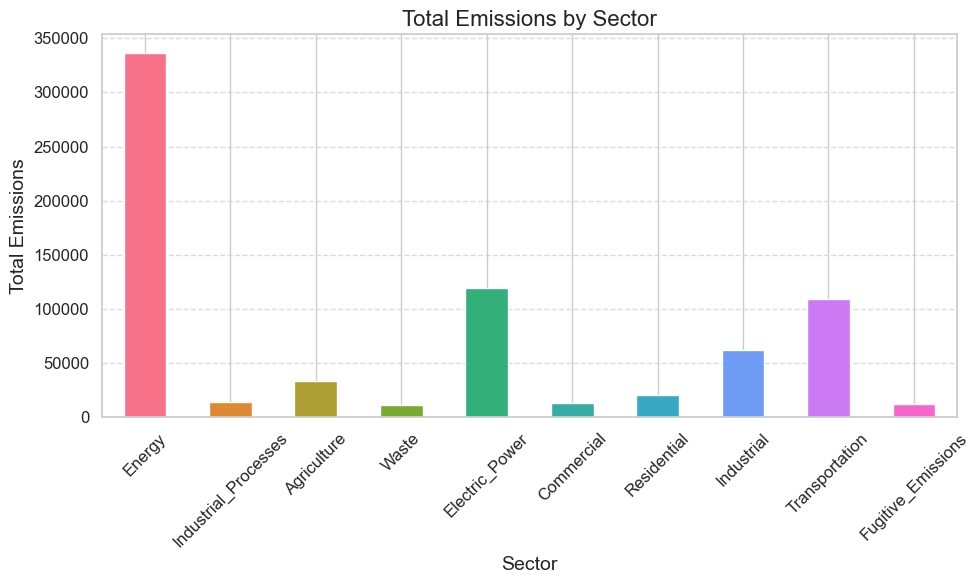

In [12]:
# Define sector columns
sector_cols = ['Energy', 'Industrial_Processes', 'Agriculture', 'Waste',
               'Electric_Power', 'Commercial', 'Residential', 'Industrial',
               'Transportation', 'Fugitive_Emissions']

# Calculate total emissions by sector
total_emissions_by_sector = df[sector_cols].sum()

# Define colors using a color palette
colors = sns.color_palette("husl", len(sector_cols))

# Plot total emissions by sector (Bar Plot)
plt.figure(figsize=(10, 6))
total_emissions_by_sector.plot(kind='bar', color=colors)

# Customize plot
plt.title('Total Emissions by Sector', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Total Emissions', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

The above bar chart provides a visual representation of total greenhouse gas emissions across various sectors. Each sector is depicted along the x-axis, while the corresponding total emissions are shown on the y-axis. The use of distinct colors for each sector aids in easy identification.  
The chart clearly illustrates the discrepancy in emissions between sectors, with the 'Energy' sector standing out for its notably higher emissions compared to others. This visual insight is invaluable for pinpointing which sectors contribute the most to greenhouse gas emissions, thereby guiding strategic efforts towards emission reduction initiatives

## Encoding Categorical Data
Let's converts the categorical string labels in the 'State' column into numerical values. This is crucial as most machine learning algorithms require numerical input.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'State' column
df['State'] = label_encoder.fit_transform(df['State'])

# Display the encoded DataFrame
df

,State,Year,Total_GHG_Emissions_Excluding_LUCF,Total_GHG_Emissions_Including_LUCF,Total_CO2_excluding_LUCF,Total_CH4,Total_N2O,Total_F-Gas,Energy,Industrial_Processes,...,Bunker_Fuels,Electric_Power,Commercial,Residential,Industrial,Transportation,Fugitive_Emissions,State_GDP,Population,Total_Energy_Use
0,0,1990,142.417267,81.645894,112.157128,23.710782,6.034132,0.515225,127.881865,3.442879,...,0.000000,50.580225,2.455356,3.233194,25.450395,29.582733,16.579961,83766.0,4050055,4.197098e+04
1,1,1990,47.394637,44.956391,35.893979,11.185360,0.278483,0.036815,45.867810,1.093494,...,0.000000,2.612978,2.210446,1.612772,15.851075,12.300752,11.279787,28772.0,553290,1.471864e+04
2,2,1990,71.687896,68.048443,63.291388,4.090110,3.480351,0.826048,64.545882,1.155930,...,0.000000,32.680547,1.915212,1.901865,3.887329,24.064867,0.096061,81606.0,3684097,2.366177e+04
3,3,1990,71.973584,24.753434,52.211375,9.563331,9.963139,0.235740,53.107620,1.151356,...,0.000000,21.697883,1.630468,2.559084,9.488513,16.882259,0.849414,44496.0,2356586,2.156930e+04
4,4,1990,430.660671,363.225554,368.717790,35.785491,23.600369,2.557020,379.550134,7.731291,...,0.000000,40.343922,19.101576,30.189209,71.881356,212.571891,5.462181,906103.0,29959515,1.876164e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,48,2018,97.296446,65.342674,82.046289,6.185934,4.346750,4.717473,81.620211,5.939311,...,0.027622,10.061289,4.766244,5.857520,13.327250,47.607909,0.000000,524486.9,7523869,2.078665e+06
1504,49,2018,115.714795,100.078012,89.895261,23.579975,1.029359,1.210201,109.725451,3.371314,...,0.000000,59.915487,1.828314,1.872126,11.468839,13.154700,21.485985,71858.7,1804291,8.329140e+05
1505,50,2018,128.884615,109.999975,101.752437,12.627558,11.445894,3.058726,101.452129,4.234074,...,0.000000,39.238932,6.683348,10.194157,14.078687,31.257005,0.000000,303767.4,5807406,1.885868e+06
1506,51,2018,88.995627,100.170035,66.742306,18.373199,3.565572,0.314551,78.844546,3.421720,...,0.000000,39.958798,0.969447,0.990317,13.544744,8.110488,15.270751,38696.3,577601,5.585940e+05


## Scaling Numerical FeaturesNow apply MinMax scaling to all columns in the DataFrame. This normalization technique scales the feature values to a range between 0 and 1, helping to ensure that all features contribute equally to the model's performance and improving the convergence speed during training..

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the DataFrame
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the scaled DataFrame
df

,State,Year,Total_GHG_Emissions_Excluding_LUCF,Total_GHG_Emissions_Including_LUCF,Total_CO2_excluding_LUCF,Total_CH4,Total_N2O,Total_F-Gas,Energy,Industrial_Processes,...,Bunker_Fuels,Electric_Power,Commercial,Residential,Industrial,Transportation,Fugitive_Emissions,State_GDP,Population,Total_Energy_Use
0,0.000000,0.0,0.018896,0.015567,0.017727,0.035523,0.013449,0.002644,0.020018,0.010537,...,0.000000,0.021386,0.008638,0.008031,0.021061,0.013809,0.065203,0.003792,0.011024,0.000384
1,0.019608,0.0,0.005975,0.009900,0.005360,0.016713,0.000545,0.000009,0.006911,0.003199,...,0.000000,0.001105,0.007683,0.003954,0.013111,0.005462,0.044359,0.000847,0.000305,0.000114
2,0.039216,0.0,0.009279,0.013467,0.009803,0.006057,0.007723,0.004356,0.009896,0.003394,...,0.000000,0.013818,0.006532,0.004681,0.003204,0.011144,0.000378,0.003676,0.009902,0.000203
3,0.058824,0.0,0.009317,0.006779,0.008006,0.014277,0.022257,0.001104,0.008068,0.003379,...,0.000000,0.009174,0.005422,0.006335,0.007842,0.007675,0.003340,0.001689,0.005833,0.000182
4,0.078431,0.0,0.058091,0.059067,0.059334,0.053656,0.052832,0.013890,0.060237,0.023933,...,0.000000,0.017058,0.073542,0.075864,0.059513,0.102185,0.021481,0.047826,0.090444,0.001825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,0.941176,1.0,0.012761,0.013049,0.012844,0.009205,0.009666,0.025789,0.012625,0.018336,...,0.042630,0.004254,0.017648,0.014635,0.011021,0.022514,0.000000,0.027392,0.021672,0.020533
1504,0.960784,1.0,0.015265,0.018415,0.014117,0.035326,0.002228,0.006471,0.017116,0.010314,...,0.000000,0.025334,0.006193,0.004606,0.009482,0.005875,0.084496,0.003154,0.004140,0.008209
1505,0.980392,1.0,0.017056,0.019948,0.016040,0.018878,0.025582,0.016653,0.015794,0.013009,...,0.000000,0.016591,0.025123,0.025548,0.011644,0.014617,0.000000,0.015573,0.016411,0.018626
1506,1.000000,1.0,0.011632,0.018429,0.010362,0.027507,0.007914,0.001538,0.012181,0.010471,...,0.000000,0.016895,0.002845,0.002387,0.011201,0.003439,0.060054,0.001379,0.000380,0.005495


In [15]:
# Extract a list of column names that have numeric data types from the DataFrame 'df'.
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

In [16]:
# Calculate the IQR for each numeric column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)

# Remove outliers
df = df[~outliers]

# Display the DataFrame after outlier removal
df

,State,Year,Total_GHG_Emissions_Excluding_LUCF,Total_GHG_Emissions_Including_LUCF,Total_CO2_excluding_LUCF,Total_CH4,Total_N2O,Total_F-Gas,Energy,Industrial_Processes,...,Bunker_Fuels,Electric_Power,Commercial,Residential,Industrial,Transportation,Fugitive_Emissions,State_GDP,Population,Total_Energy_Use
1,0.019608,0.0,0.005975,0.009900,0.005360,0.016713,0.000545,0.000009,0.006911,0.003199,...,0.0,0.001105,0.007683,0.003954,0.013111,0.005462,0.044359,0.000847,0.000305,0.000114
2,0.039216,0.0,0.009279,0.013467,0.009803,0.006057,0.007723,0.004356,0.009896,0.003394,...,0.0,0.013818,0.006532,0.004681,0.003204,0.011144,0.000378,0.003676,0.009902,0.000203
3,0.058824,0.0,0.009317,0.006779,0.008006,0.014277,0.022257,0.001104,0.008068,0.003379,...,0.0,0.009174,0.005422,0.006335,0.007842,0.007675,0.003340,0.001689,0.005833,0.000182
5,0.098039,0.0,0.011419,0.017120,0.010232,0.020438,0.016724,0.001624,0.011398,0.001927,...,0.0,0.013287,0.014691,0.013527,0.004629,0.009227,0.029058,0.004069,0.008748,0.000201
6,0.117647,0.0,0.005553,0.008833,0.006222,0.002435,0.002519,0.001138,0.006234,0.000650,...,0.0,0.004645,0.013998,0.020702,0.002429,0.007053,0.000000,0.005795,0.008700,0.000160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,0.509804,1.0,0.006089,0.011417,0.004735,0.013312,0.014414,0.004242,0.005003,0.005013,...,0.0,0.006314,0.005773,0.004491,0.003826,0.003479,0.010292,0.001803,0.001861,0.004274
1485,0.568627,1.0,0.001667,0.004223,0.001868,0.000542,0.000425,0.003700,0.001897,0.002018,...,0.0,0.000874,0.004836,0.007813,0.000666,0.002890,0.000000,0.003385,0.002758,0.003181
1495,0.764706,1.0,0.001211,0.004710,0.001404,0.000207,0.000167,0.002845,0.001390,0.002278,...,0.0,0.001343,0.002887,0.005740,0.000510,0.001552,0.000000,0.002152,0.001853,0.001921
1497,0.803922,1.0,0.005335,0.008923,0.002159,0.013857,0.037537,0.002367,0.002078,0.003352,...,0.0,0.001201,0.002462,0.002853,0.003166,0.002833,0.000137,0.001839,0.001303,0.003895


## Comparative Scatter Plots of Variables Against Total Energy Use  
Let's creates a matrix of scatter plots that compare various variables (presumably environmental or economic indicators) with the 'Total_Energy_Use'.  
It utilizes a subplot grid of 5 rows and 4 columns to organize individual scatter plots. For each variable, a scatter plot is generated to visualize its relationship with total energy use. The cell also includes code to hide any unused subplot spaces, ensuring a neat presentation.

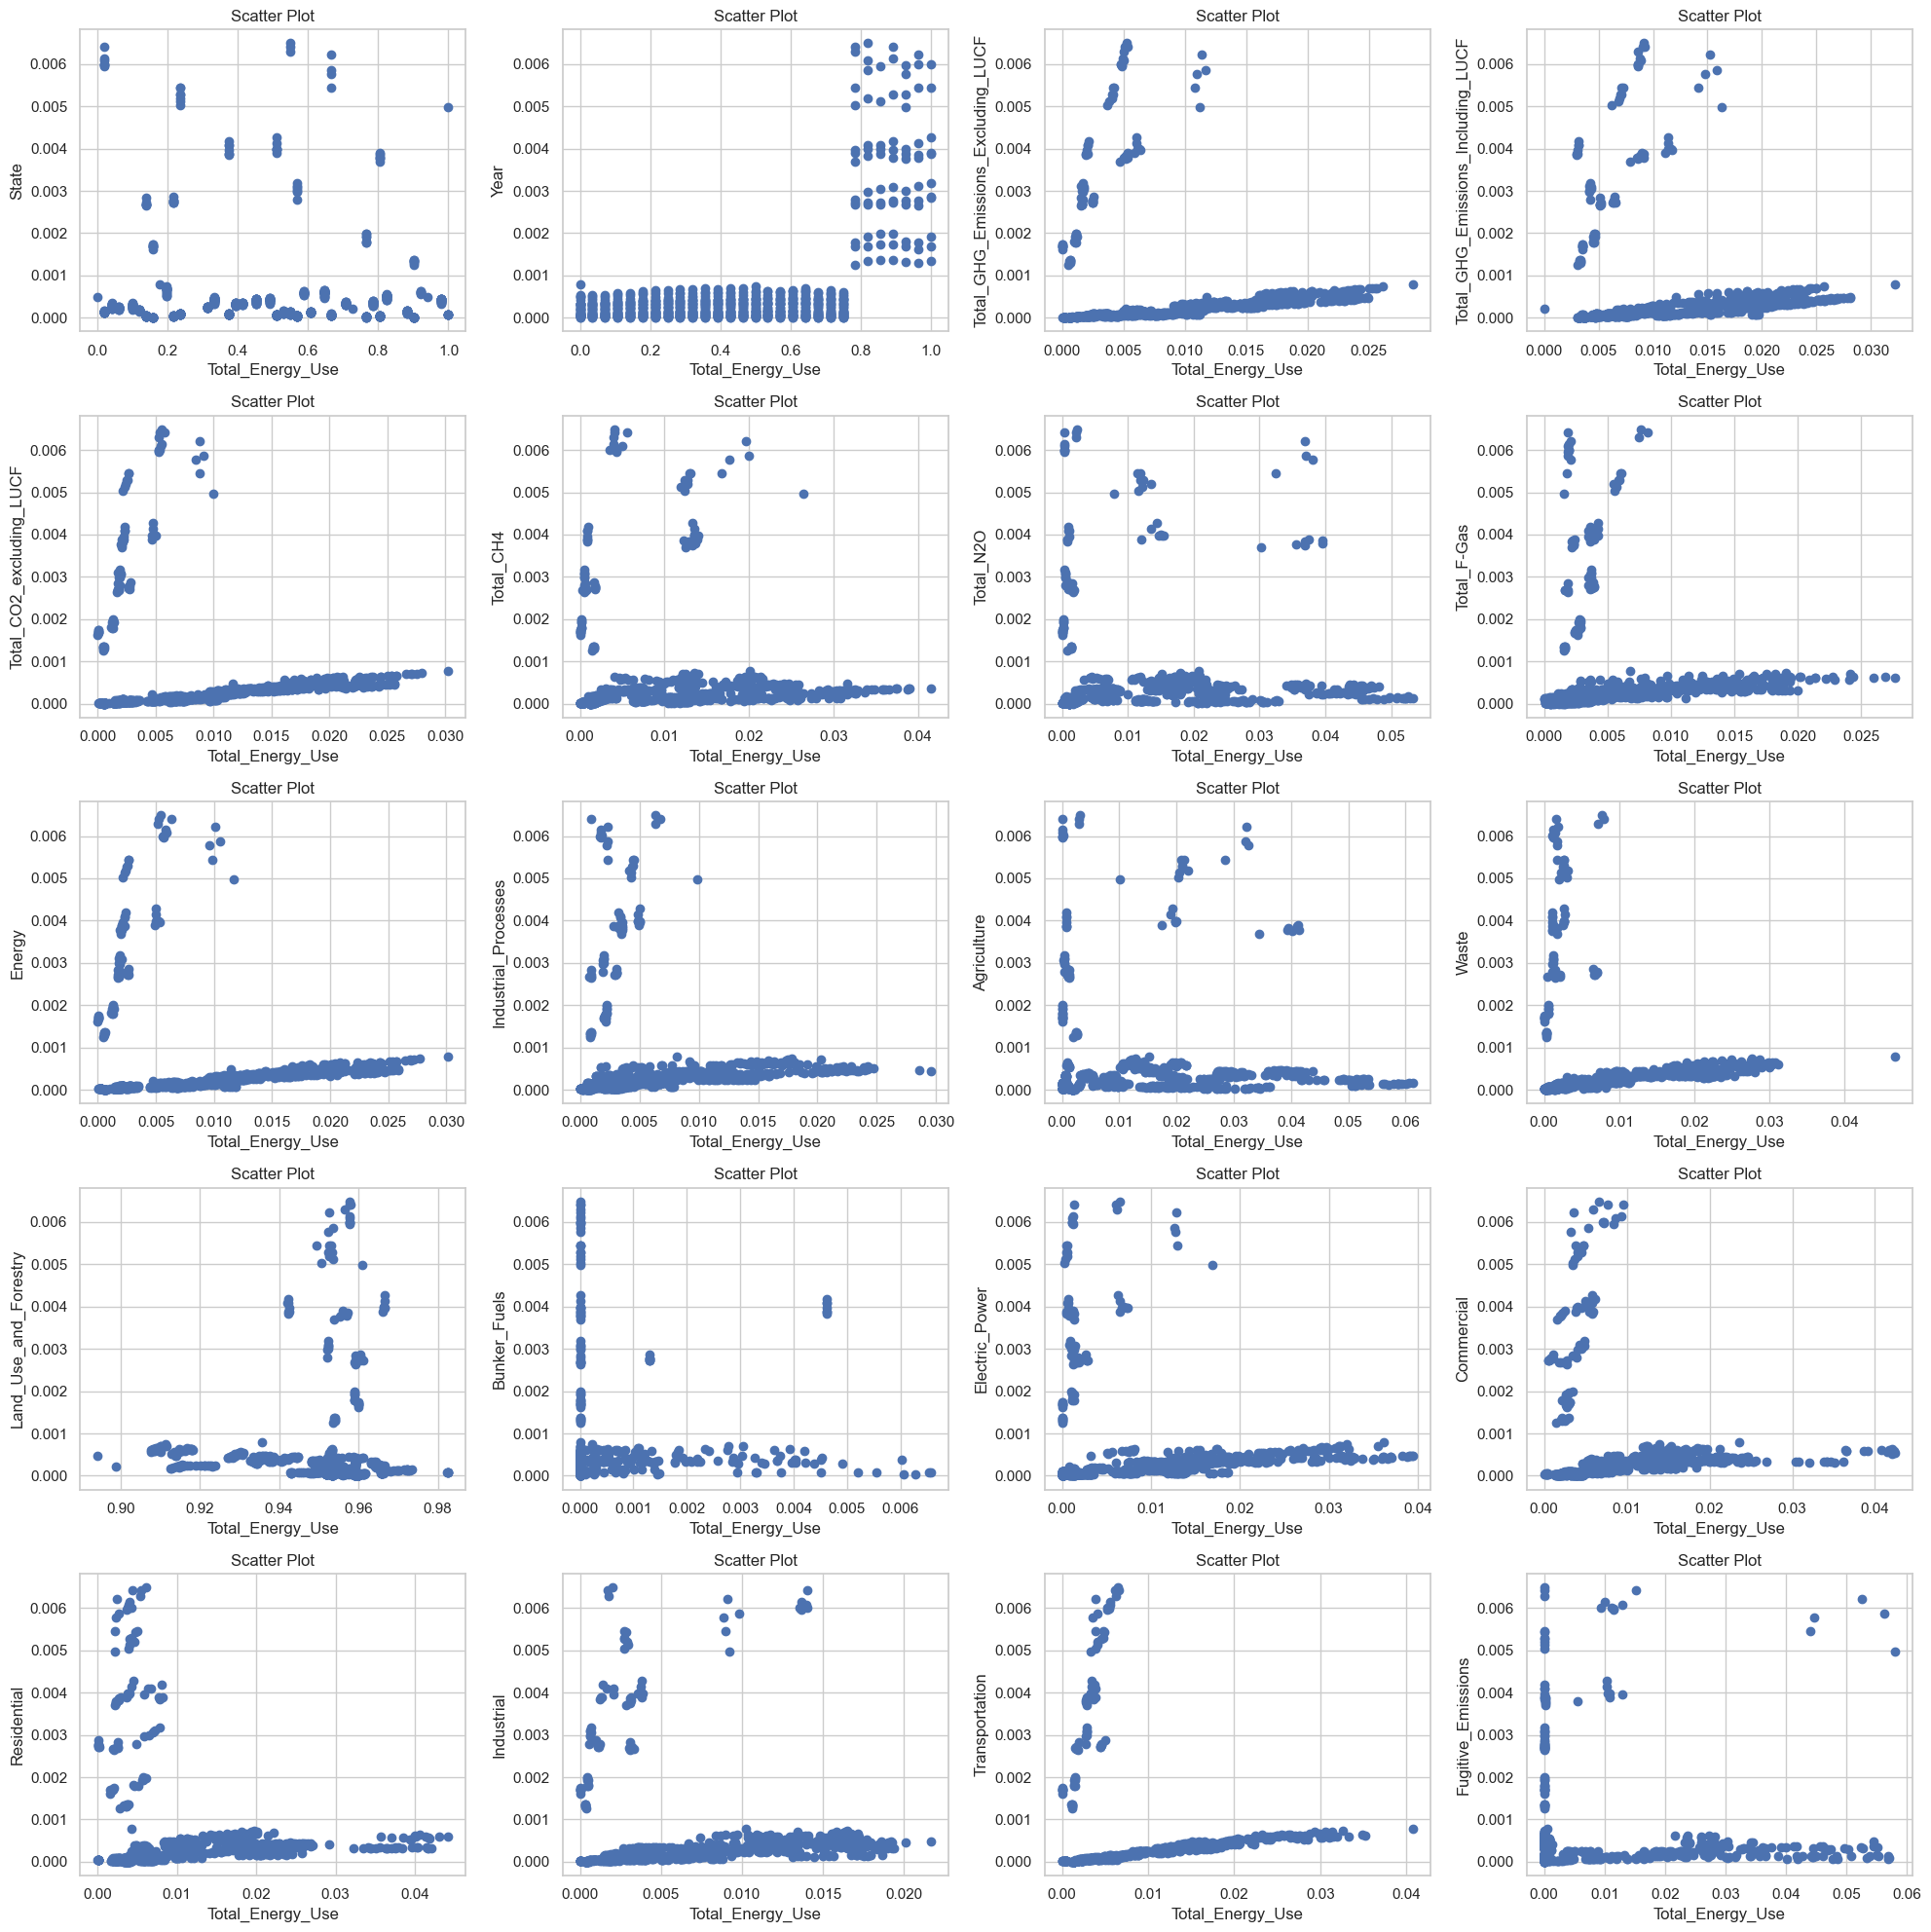

In [17]:
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Limit the number of variables to the number of available subplots
variables = variables[:20]

# Loop through variables and plot them
for i, var in enumerate(variables):
    ax = axes[i]
    ax.scatter(df[var], df['Total_Energy_Use'])
    ax.set_xlabel('Total_Energy_Use')
    ax.set_ylabel(var)
    ax.set_title('Scatter Plot')

# Hide any unused subplots
for ax in axes[len(variables):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

Above is the collection of 20 scatter plots arranged in a grid, each plot illustrating the relationship between the total energy use and a different variable. The x-axis is consistently 'Total_Energy_Use' across all plots, while the y-axis varies according to the specific variable being plotted.

The plots are designed to allow for easy comparison between how different variables correlate with energy usage. The density and distribution of the points can give insights into the nature of the relationships, such as whether they are linear, exponential, or have no apparent correlation. The clear labeling and individual titles for each plot facilitate understanding each variable's interaction with energy consumption. This visual analysis is crucial for identifying patterns and potential areas of focus for further statistical analysis or policy-making.

## Distribution Analysis of Key Environmental and Economic Variables
Let's generates a series of histograms for a set of specified numeric columns representing various environmental and economic variables. These histograms are plotted to visualize the distribution of values within each column, providing insights into their spread, central tendency, and skewness.  
The scaled_df suggests that the data may have been normalized or standardized prior to plotting, which is a common practice to compare variables on the same scale.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale only numeric columns
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

scaled_df = df_scaled  # This will be used in the histogram plotting

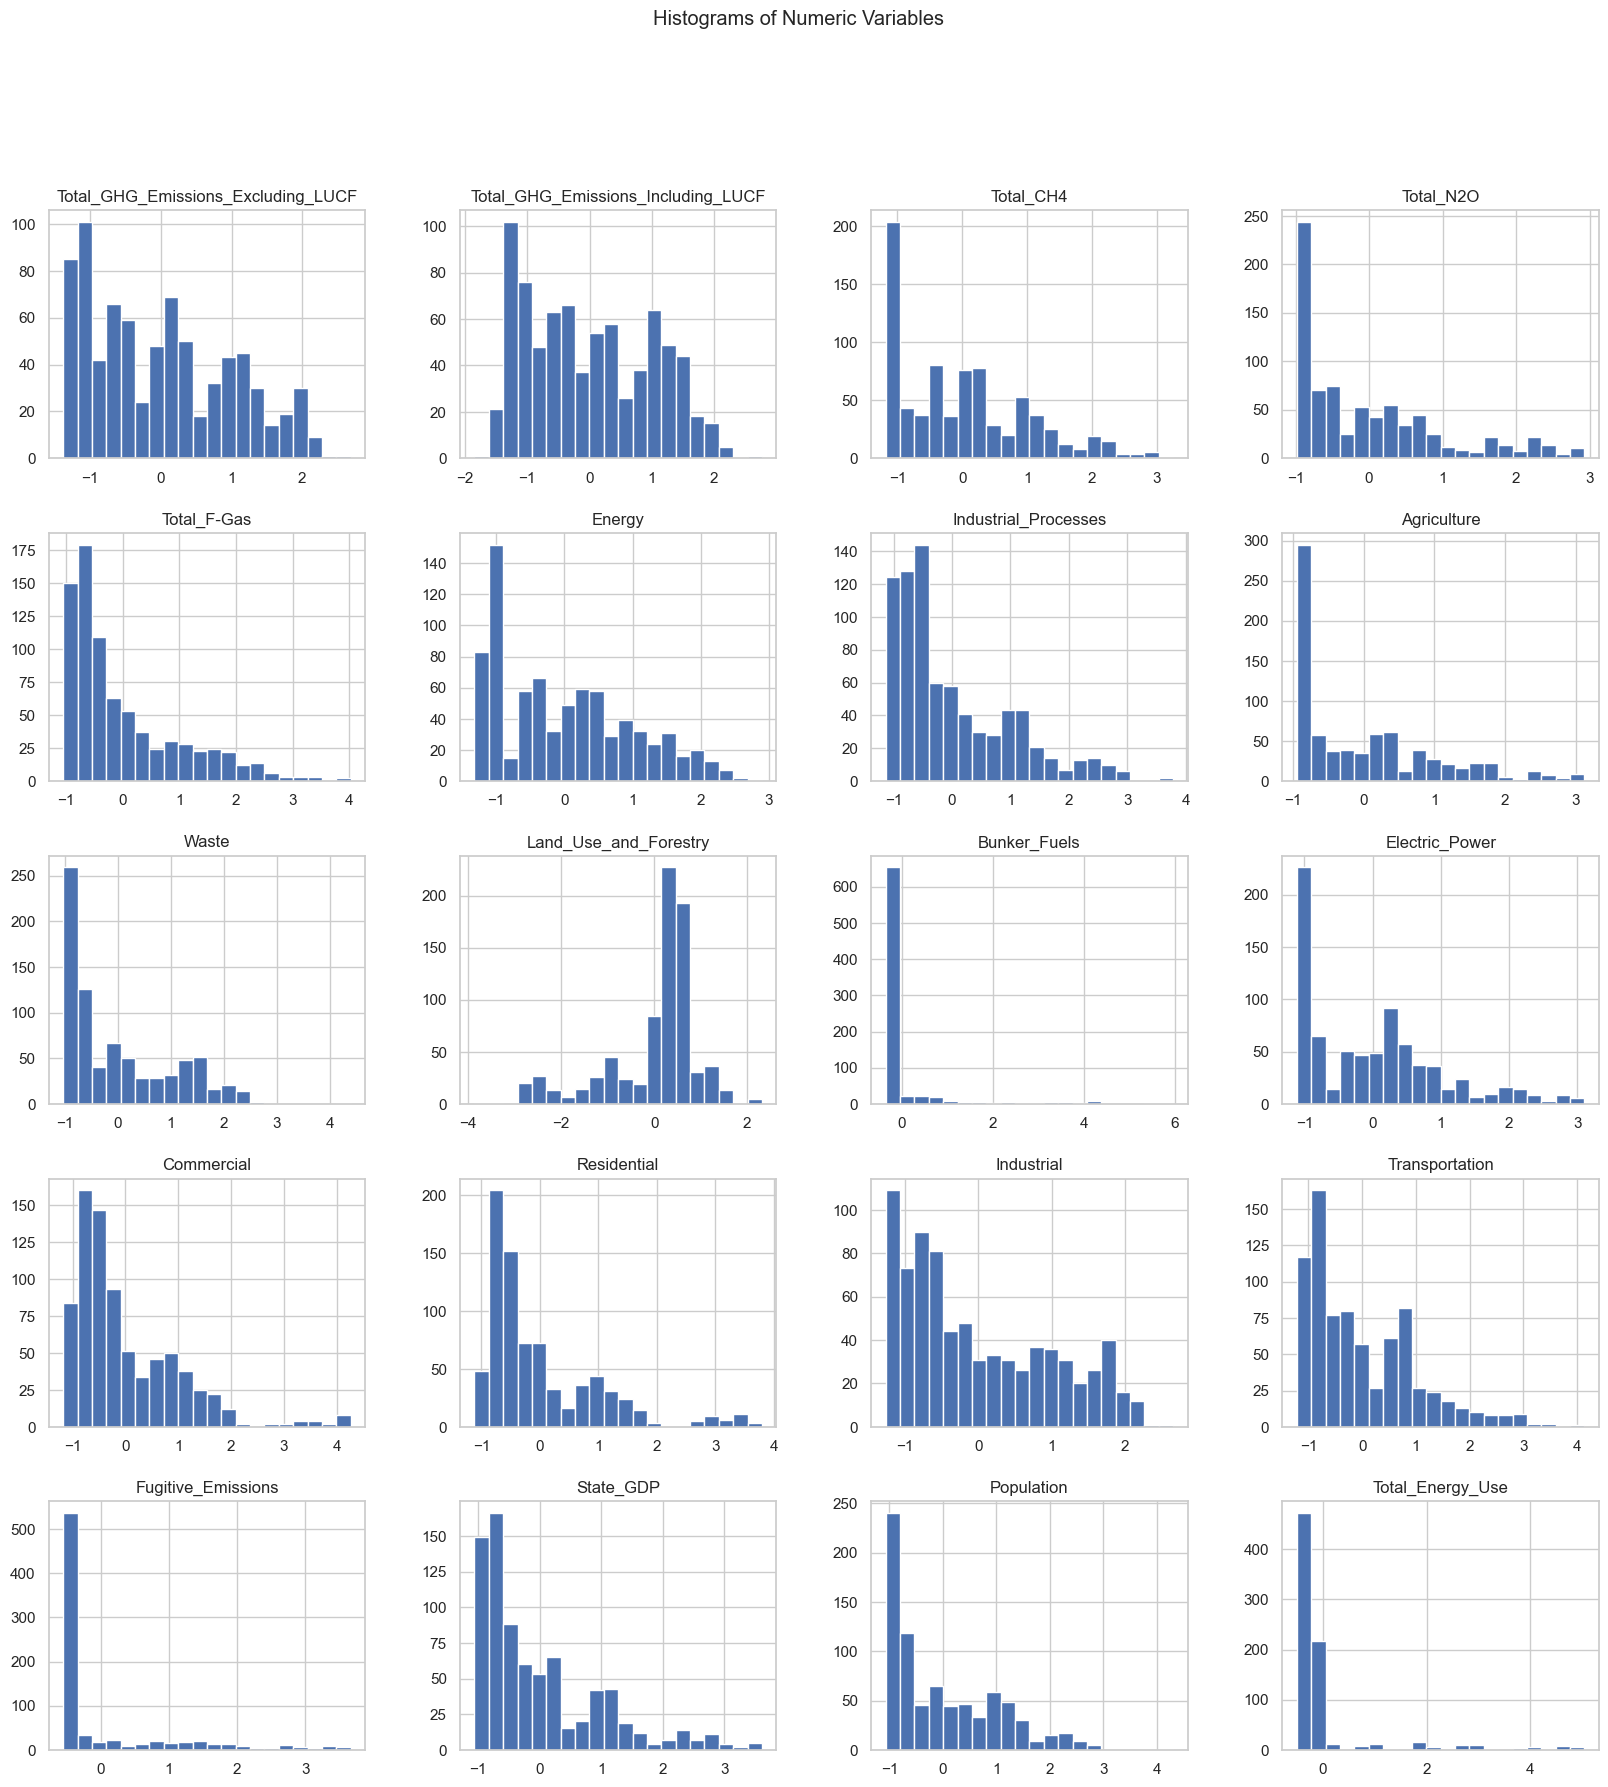

In [19]:
# Visualizing distributions of numeric variables
numeric_cols = ['Total_GHG_Emissions_Excluding_LUCF', 'Total_GHG_Emissions_Including_LUCF',
                'Total_CH4', 'Total_N2O', 'Total_F-Gas',
                'Energy', 'Industrial_Processes', 'Agriculture', 'Waste',
                'Land_Use_and_Forestry', 'Bunker_Fuels', 'Electric_Power',
                'Commercial', 'Residential', 'Industrial', 'Transportation',
                'Fugitive_Emissions', 'State_GDP', 'Population', 'Total_Energy_Use']

scaled_df[numeric_cols].hist(bins=20, figsize=(20, 20))
plt.suptitle('Histograms of Numeric Variables')
plt.show()

Each histogram correspondes to a different variable from the dataset. These histograms provide a quick way to assess the distribution of each variable, showing how often different ranges of values occur. For instance, we can see if the data is normally distributed, skewed, bimodal, etc.  
This visual inspection is essential in data analysis to identify anomalies, patterns, or characteristics of the data that may influence further analysis, modeling, or decision-making processes. The title 'Histograms of Numeric Variables' collectively labels these plots, while the axes titles (which seem to be normalized values) would typically indicate the data range and frequency.

## Heatmap Visualization of Variable Correlation Matrix  
Now computing the correlation matrix for the DataFrame and visualizes it as a heatmap. The heatmap uses the 'coolwarm' color palette to distinguish between positive and negative correlations, annotations to display the correlation coefficients, and aesthetic formatting to improve readability.

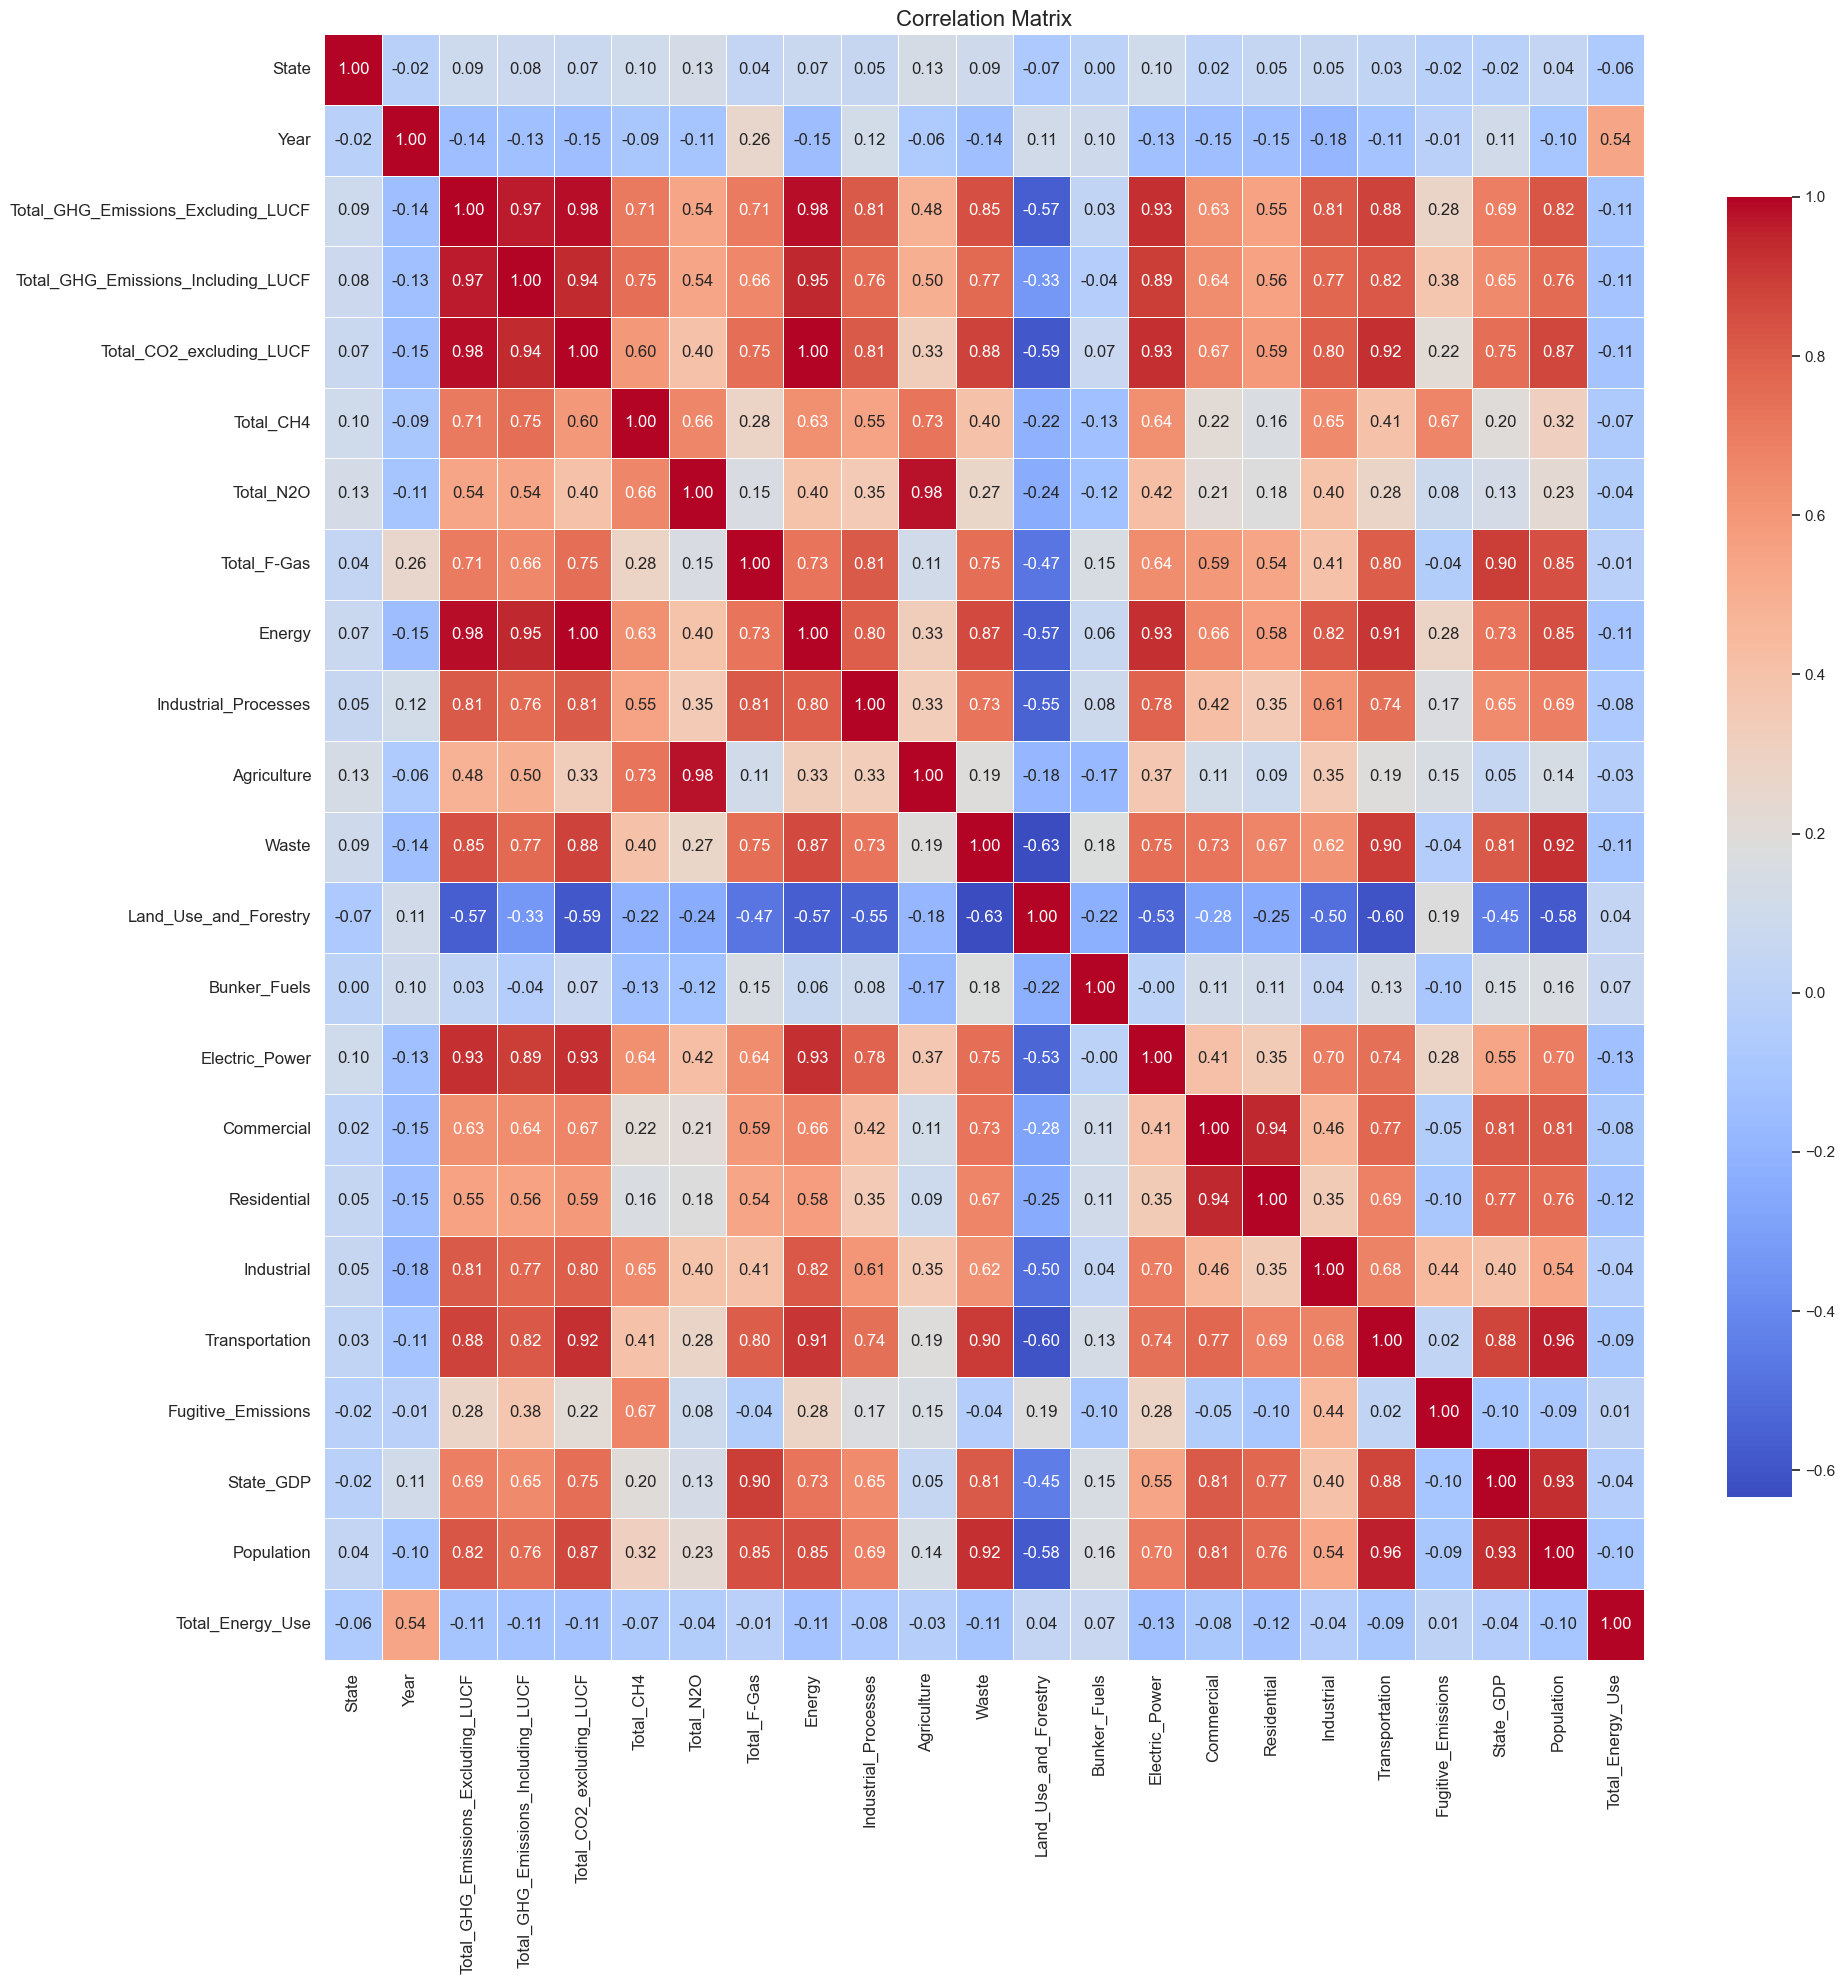

In [20]:
# Calculating correlation matrix
correlation_matrix = df.corr()

# Setting up the plot
plt.figure(figsize=(20, 20))

# Plot heatmap
sns.heatmap(correlation_matrix, 
            annot=True,            # Show correlation values
            cmap='coolwarm',      # Color map
            fmt=".2f",            # Format of annotations
            linewidths=.5,        # Width of lines that divide each cell
            cbar_kws={"shrink": .8})  # Size of color bar

# Customize plot
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent cutoff of labels

# Show plot
plt.show()


Above is a heatmap that provides a visual representation of the correlation coefficients between the variables in the DataFrame. Each cell in the heatmap corresponds to the correlation between two variables, with the color indicating the strength and direction of the correlation—red for positive and blue for negative correlations. The annotations in each cell display the actual numerical value of the correlation coefficient, allowing for precise interpretation. This visualization makes it easy to identify relationships between variables at a glance, which can be particularly useful in feature selection for modeling or identifying potential multicollinearity issues.

In [21]:
df.corr()

,State,Year,Total_GHG_Emissions_Excluding_LUCF,Total_GHG_Emissions_Including_LUCF,Total_CO2_excluding_LUCF,Total_CH4,Total_N2O,Total_F-Gas,Energy,Industrial_Processes,...,Bunker_Fuels,Electric_Power,Commercial,Residential,Industrial,Transportation,Fugitive_Emissions,State_GDP,Population,Total_Energy_Use
State,1.000000,-0.016112,0.090302,0.079914,0.073285,0.100764,0.128056,0.039492,0.070175,0.052106,...,0.001249,0.101474,0.015075,0.045916,0.050939,0.026566,-0.016885,-0.017952,0.040750,-0.060064
Year,-0.016112,1.000000,-0.144267,-0.131144,-0.147227,-0.093496,-0.107897,0.257315,-0.152906,0.117794,...,0.096749,-0.132649,-0.148539,-0.148122,-0.184573,-0.114896,-0.010623,0.109438,-0.098409,0.542461
Total_GHG_Emissions_Excluding_LUCF,0.090302,-0.144267,1.000000,0.965889,0.983998,0.711539,0.541721,0.705818,0.984919,0.814174,...,0.029090,0.926638,0.632901,0.554254,0.813673,0.883164,0.277122,0.691374,0.822585,-0.110271
Total_GHG_Emissions_Including_LUCF,0.079914,-0.131144,0.965889,1.000000,0.939781,0.746027,0.543769,0.658535,0.948457,0.759808,...,-0.036254,0.893205,0.636797,0.555951,0.773659,0.820721,0.375888,0.650662,0.759273,-0.113558
Total_CO2_excluding_LUCF,0.073285,-0.147227,0.983998,0.939781,1.000000,0.596692,0.401133,0.746266,0.997547,0.812783,...,0.066390,0.926507,0.670777,0.591174,0.799903,0.924527,0.220196,0.747213,0.871232,-0.114142
Total_CH4,0.100764,-0.093496,0.711539,0.746027,0.596692,1.000000,0.663267,0.280683,0.630121,0.548051,...,-0.129518,0.635977,0.216977,0.160980,0.654669,0.405390,0.672049,0.196329,0.316761,-0.068085
Total_N2O,0.128056,-0.107897,0.541721,0.543769,0.401133,0.663267,1.000000,0.153708,0.395560,0.349913,...,-0.123927,0.421948,0.211372,0.183721,0.395864,0.276354,0.081153,0.127610,0.230908,-0.040501
Total_F-Gas,0.039492,0.257315,0.705818,0.658535,0.746266,0.280683,0.153708,1.000000,0.726838,0.814457,...,0.147349,0.639767,0.592402,0.543709,0.406136,0.804450,-0.042300,0.895365,0.845710,-0.010927
Energy,0.070175,-0.152906,0.984919,0.948457,0.997547,0.630121,0.395560,0.726838,1.000000,0.798794,...,0.058658,0.928341,0.659772,0.578458,0.815827,0.912318,0.283810,0.728427,0.853073,-0.113352
Industrial_Processes,0.052106,0.117794,0.814174,0.759808,0.812783,0.548051,0.349913,0.814457,0.798794,1.000000,...,0.081407,0.784868,0.420640,0.350652,0.606325,0.738819,0.168410,0.648006,0.690915,-0.075976


## Linear Regression Model for Predicting Total Energy Use  
Evaluating the Linear Regression model to predict 'Total Energy Use' based on a set of predictors including greenhouse gas emissions, energy production, economic data, and more. It involves splitting the dataset into training and testing sets, fitting the Linear Regression model on the training data, and then making predictions on the test set.  
The performance of the model is evaluated using the Mean Squared Error (MSE) and Mean Absolute Error (MAE), which are printed out as part of the model's evaluation. The presence of non-numeric columns like 'State' may indicate that some preprocessing steps (like one-hot encoding) are assumed to have been conducted prior to this code.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Assuming 'X' contains your predictor variables and 'y' contains your target variable
X = df[['State', 'Year', 'Total_GHG_Emissions_Including_LUCF', 'Total_CO2_excluding_LUCF', 'Total_CH4', 'Total_N2O', 'Total_F-Gas', 'Energy', 'Industrial_Processes', 'Agriculture', 'Waste', 'Land_Use_and_Forestry', 'Bunker_Fuels', 'Electric_Power', 'Commercial', 'Residential', 'Industrial', 'Transportation', 'Fugitive_Emissions', 'State_GDP', 'Population']]
y = df['Total_Energy_Use']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 9.406066513888e-07
Mean Absolute Error: 0.0006539756481898166


## Random Forest Regression for Energy Use Prediction  
Implement the Random Forest Regression to predict the 'Total Energy Use' based on a comprehensive set of features that may affect energy consumption. The process includes selecting the predictor variables and the target, splitting the dataset into training and test subsets, creating a Random Forest Regressor model, training this model with the training data, and then predicting energy use on the test set.  
After making predictions, the model's performance is assessed by calculating the Mean Squared Error (MSE) and Mean Absolute Error (MAE), which provide measures of the model's accuracy and are outputted for review.

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd


# Define predictor variables (X) and target variable (y)
X = df[['State', 'Year', 'Total_GHG_Emissions_Including_LUCF', 'Total_CO2_excluding_LUCF', 'Total_CH4', 'Total_N2O', 'Total_F-Gas', 'Energy', 'Industrial_Processes', 'Agriculture', 'Waste', 'Land_Use_and_Forestry', 'Bunker_Fuels', 'Electric_Power', 'Commercial', 'Residential', 'Industrial', 'Transportation', 'Fugitive_Emissions', 'State_GDP', 'Population']]
y = df['Total_Energy_Use']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 1.334830809764627e-09
Mean Absolute Error: 1.6613723424233334e-05


## Feature Importance Analysis in Energy Use Prediction with XGBoost  
Iinitializes an XGBoost regression model to assess the importance of various features in predicting 'Total Energy Use'. The model is trained with the full dataset and then uses the built-in plot_importance function from XGBoost to generate a visual representation of feature importance, which helps in understanding which variables have the most significant influence on the model's predictions.

In [24]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Define predictor variables (X) and target variable (y)
X = df[['State', 'Year', 'Total_GHG_Emissions_Including_LUCF', 'Total_CO2_excluding_LUCF', 'Total_CH4', 'Total_N2O', 'Total_F-Gas', 'Energy', 'Industrial_Processes', 'Agriculture', 'Waste', 'Land_Use_and_Forestry', 'Bunker_Fuels', 'Electric_Power', 'Commercial', 'Residential', 'Industrial', 'Transportation', 'Fugitive_Emissions', 'State_GDP', 'Population']]
y = df['Total_Energy_Use']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBoost regression model
model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 7.965364879032124e-09
Mean Absolute Error: 6.112906262424926e-05


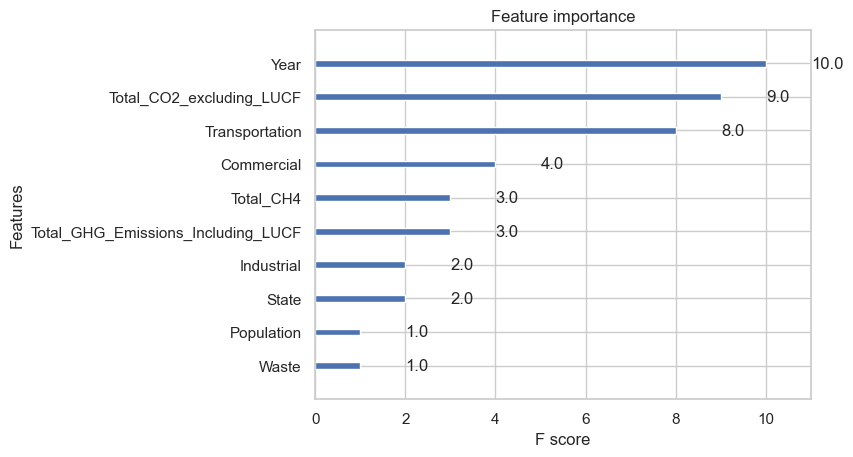

In [25]:
import xgboost as xgb

# Define predictor variables (X) and target variable (y)
X = df[['State', 'Year', 'Total_GHG_Emissions_Including_LUCF', 'Total_CO2_excluding_LUCF', 'Total_CH4', 'Total_N2O', 'Total_F-Gas', 'Energy', 'Industrial_Processes', 'Agriculture', 'Waste', 'Land_Use_and_Forestry', 'Bunker_Fuels', 'Electric_Power', 'Commercial', 'Residential', 'Industrial', 'Transportation', 'Fugitive_Emissions', 'State_GDP', 'Population']]
y = df['Total_Energy_Use']

# Create the XGBoost regression model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X, y)

# Plot feature importances
xgb.plot_importance(model)
plt.show()

The above bar chart showing the importance of each feature in the XGBoost regression model, as measured by the feature's F-score. An F-score is a metric that shows the number of times a feature is used to split the data across all trees within the model.  
The higher the score, the more significant the feature. According to the chart, 'Total CO2 excluding LUCF' appears to be the most important feature, followed by 'Total GHG Emissions Including LUCF' and 'Land_Use_and_Forestry'. Features like 'Bunker Fuels' have the least importance. This kind of analysis is crucial for refining models by focusing on the most informative variables and potentially simplifying the model by removing less important features.

## Hyperparameter Tuning and Feature Importance in GHG Emissions Prediction
This series of steps in predictive modeling using XGBoost, a powerful machine learning algorithm. 
The process includes:
1) Defining predictor variables and the target variable for the model.
2) Splitting the data into training and testing sets.
3) Initializing an XGBoost regressor with default settings.
4) Using grid search to explore a range of hyperparameters across a predefined grid to find the best combination based on the negative mean squared error.
5) Re-training the XGBoost model with the best-found hyperparameters.
6) Predicting the test set and evaluating the model using mean squared error and mean absolute error.
7) Visualizing the feature importance based on the fitted model to understand which features contribute most to predicting total greenhouse gas emissions excluding LUCF.

In [26]:
import xgboost as xgb
# 
# Define predictor variables (X) and target variable (y)
X = df[['State', 'Year', 'Total_GHG_Emissions_Including_LUCF', 'Total_CO2_excluding_LUCF', 'Total_CH4', 'Total_N2O', 'Total_F-Gas', 'Energy', 'Industrial_Processes', 'Agriculture', 'Waste', 'Land_Use_and_Forestry', 'Bunker_Fuels', 'Electric_Power', 'Commercial', 'Residential', 'Industrial', 'Transportation', 'Fugitive_Emissions', 'State_GDP', 'Population', 'Total_Energy_Use']]
y = df['Total_GHG_Emissions_Excluding_LUCF']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regressor object
model = xgb.XGBRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300]
}

# Create the grid search object
scoring = {'neg_mean_squared_error': 'neg_mean_squared_error', 'neg_mean_absolute_error': 'neg_mean_absolute_error'}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring=scoring, refit='neg_mean_squared_error', verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_estimator_.get_params()

# Create and train the final model with the best hyperparameters
final_model = xgb.XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = final_model.predict(X_test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_es

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2.727641514539425e-07
Mean Absolute Error: 0.0002717157471722454


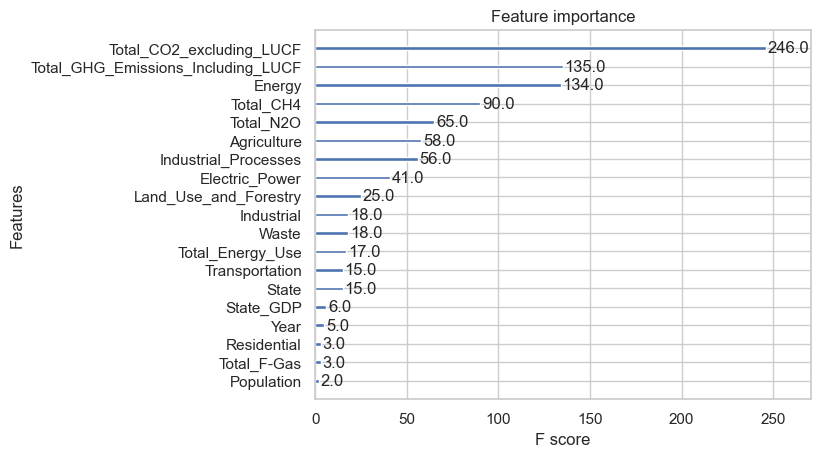

In [28]:
# Plot feature importance
xgb.plot_importance(final_model)
plt.show()

The bar chart displaying the feature importances from the final tuned XGBoost model.  
Each bar represents a feature's importance in the model, quantified by the F score, which reflects how often the feature was used to split the data across all trees. The features 'Total CO2 excluding LUCF' and 'Total GHG Emissions Including LUCF' show the highest importance, indicating their strong influence on the model's predictions. This visualization is instrumental in pinpointing which predictors are most impactful, potentially guiding efforts to reduce emissions or informing policymakers about key factors to consider.

# Conclusion
 
The project on historical GHG emissions provided valuable insights into the factors influencing greenhouse gas emissions.
 
Key findings include the identification of fluctuating emission trends over time and the recognition of specific sectors, like energy, as significant contributors.
 
Correlation analyses clarified the relationships between economic factors and emissions, while predictive modeling helped quantify the impact of various predictors.
 
Three primary models, **Linear Regression, Random Forest, and XGBoost** were used for predictions, with the latter revealing CO2 emissions as the most influential factor. The project highlighted the importance of meticulous data preparation, including outlier management and feature distribution analysis.
 
<div style="display: flex; justify-content: center; align-items: center;">
<img src="images/5.jpg" width="300" height="300" style="margin-right: 20px; margin-left: 180px">
</div>
 
In summary, the analysis emphasizes the multifaceted nature of GHG emissions and the need for comprehensive strategies to reduce them. The insights and models from this project can aid in shaping informed policies and actions to address the climate crisis.
 
Future work could focus on incorporating more detailed data and advanced modeling to enhance predictive accuracy.

## References  
Dataset: https://www.wri.org/data/climate-watch-us-states-greenhouse-gas-emissions  
XGBoost Documentation: https://xgboost.readthedocs.io/en/stable/